In [23]:
import numpy as np     #只需要下载numpy库即可
import random
import sys
sys.path.append('..')
from draw import draw  #绘图函数
from GridWorld_v3 import GridWorld_v3

In [28]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3(forbiddenAreaScore=-1, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

import tqdm
policy=0.2*np.ones((25,5))
gamma=0.99
learning_rate=0.01
value=np.random.randn(25)
action_value=np.random.rand(25,5)
TrajectoryPool=[gridworld.getTrajectoryScore(nowState=10, action=np.random.randint(0,5), policy=policy) for _ in range(500)]

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

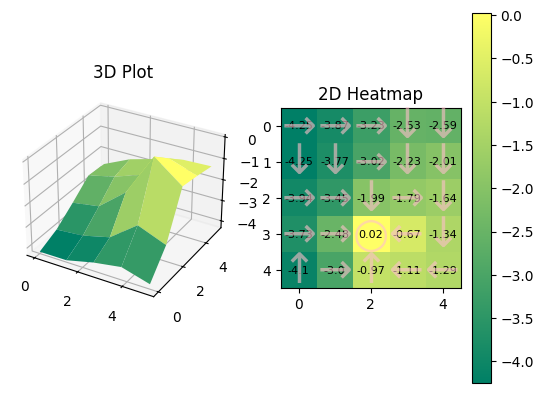

 16%|████████████▉                                                                    | 16/100 [00:00<00:01, 44.03it/s]

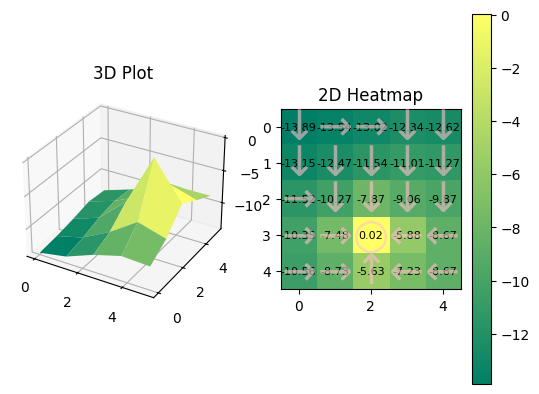

 37%|█████████████████████████████▉                                                   | 37/100 [00:00<00:01, 48.67it/s]

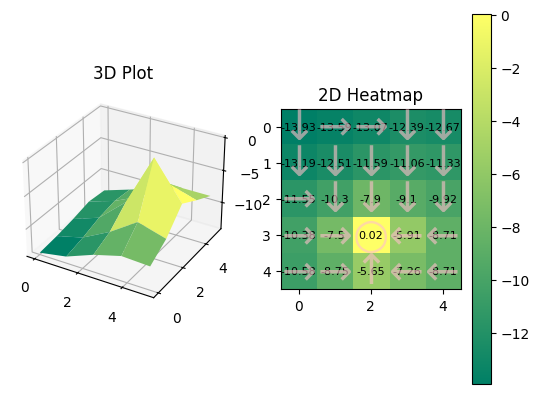

 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:01<00:00, 47.03it/s]

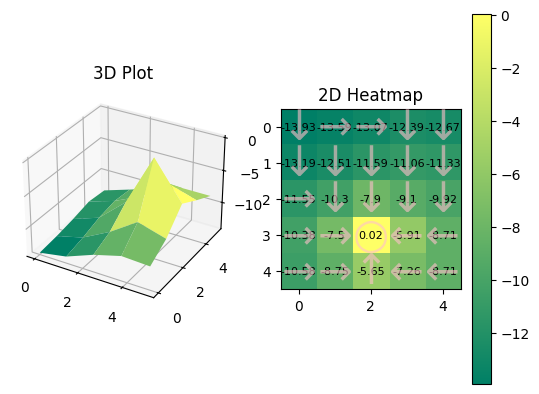

 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:01<00:00, 44.67it/s]

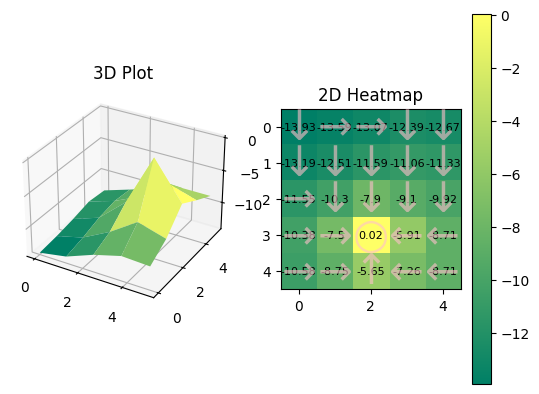

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 40.78it/s]


In [17]:
# TD to solve BE state value
for t in tqdm.tqdm(range(100)):
    for Trajectory in TrajectoryPool:
        for step in range(len(Trajectory)-1,-1,-1):

            # terminal终止状态
            tmp_state,tmp_action,reward,next_state,next_action,terminal=Trajectory[step]
            target=reward+(1-terminal)*gamma*value[next_state]
            TD_error=value[tmp_state]-target
            value[tmp_state]-=learning_rate*TD_error

            

    for i in range(25):
        for j in range(5):
            score,next_state=gridworld.getScore(i,j)
            action_value[i][j]=score+gamma*value[next_state]

    p=np.argmax(action_value,axis=1)
    if t%20==0:
        draw(value.reshape(5,5),p)
            

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

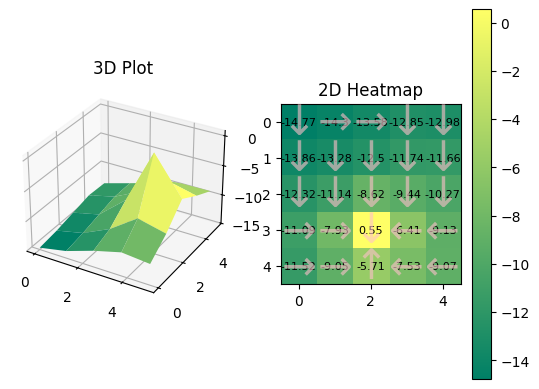

 17%|█████████████▊                                                                   | 17/100 [00:00<00:02, 29.02it/s]

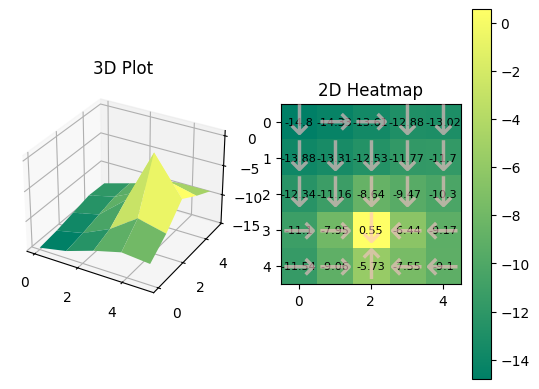

 40%|████████████████████████████████▍                                                | 40/100 [00:01<00:01, 30.06it/s]

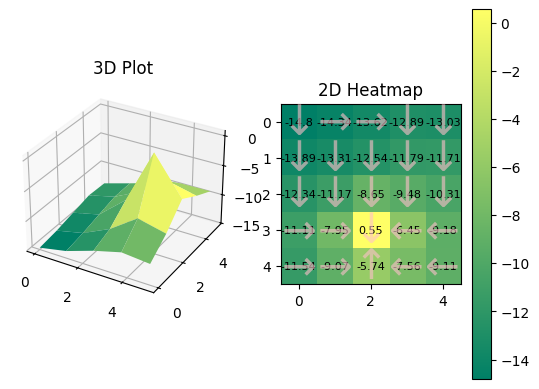

 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:02<00:01, 28.51it/s]

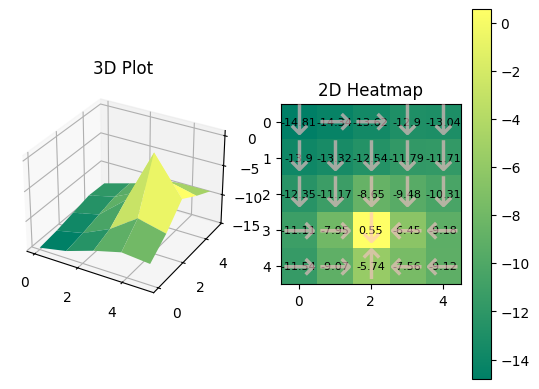

 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:03<00:00, 28.42it/s]

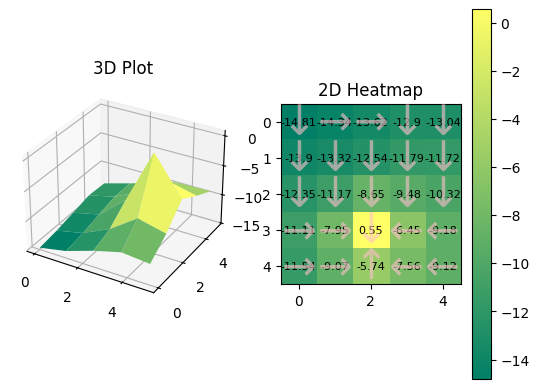

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.95it/s]


In [21]:
# TD to solve BE action value
for t in tqdm.tqdm(range(100)):
    for Trajectory in TrajectoryPool:
        for step in range(len(Trajectory)-1,-1,-1):

            # terminal终止状态
            tmp_state,tmp_action,reward,next_state,next_action,terminal=Trajectory[step]
            
            target=reward+(1-terminal)*gamma*action_value[next_state][next_action]
            TD_error=action_value[tmp_state][tmp_action]-target
            action_value[tmp_state][tmp_action]-=learning_rate*TD_error
    
    if t%20==0:
        p=np.argmax(action_value,axis=1)
        # policy=np.eye(5)[np.argmax(action_value,axis=1)]

        # 为什么不需要更新Policy???
        value=(policy*action_value).sum(axis=1)
        
        draw(value.reshape(5,5),p)
            

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

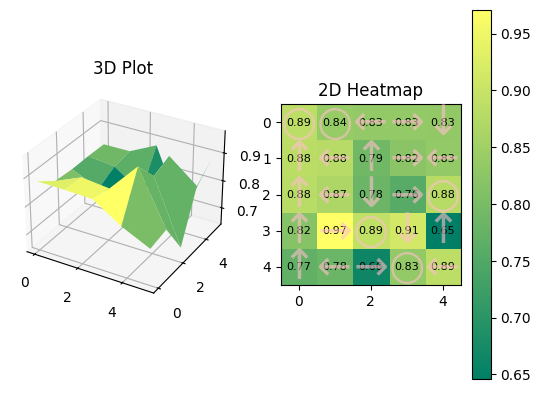

 20%|████████████████▏                                                                | 20/100 [00:01<00:04, 18.70it/s]

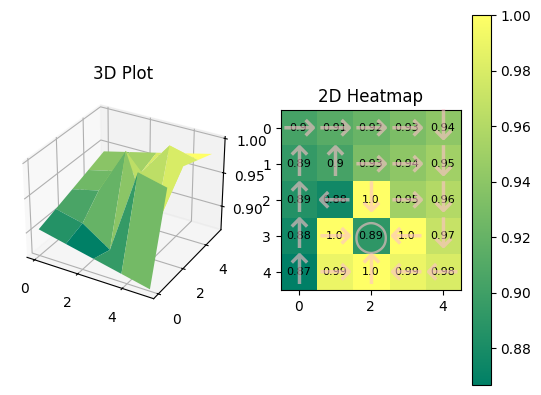

 40%|████████████████████████████████▍                                                | 40/100 [00:02<00:03, 18.23it/s]

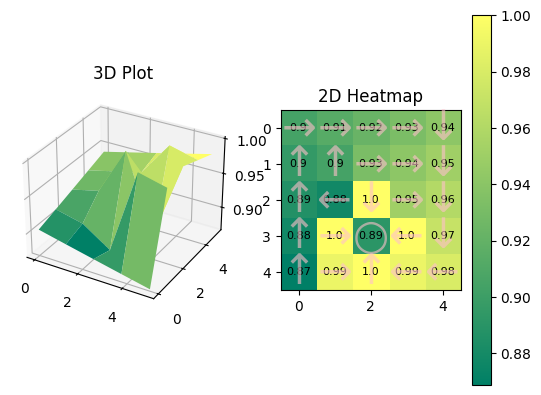

 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:03<00:02, 18.59it/s]

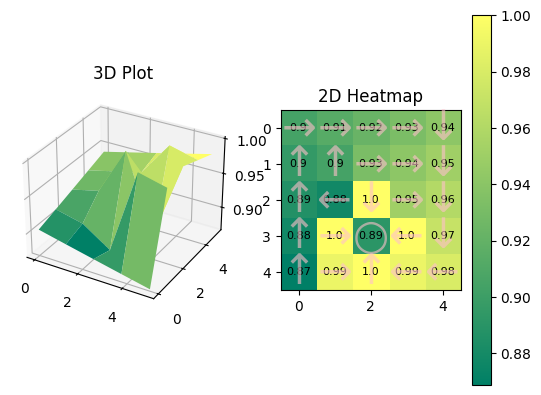

 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:04<00:01, 20.27it/s]

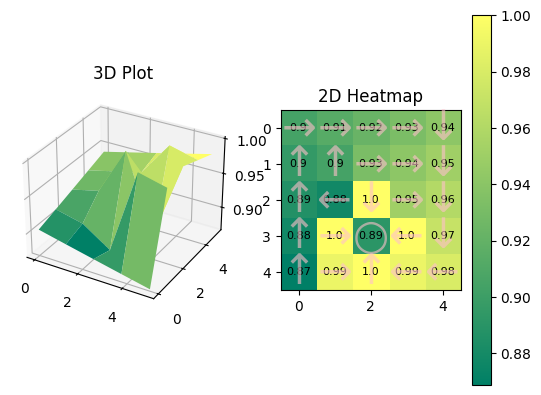

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.33it/s]


In [29]:
# TD to solve BOE optimal  action value
for t in tqdm.tqdm(range(100)):
    for Trajectory in TrajectoryPool:
        for step in range(len(Trajectory)-1,-1,-1):

            # terminal终止状态
            tmp_state,tmp_action,reward,next_state,next_action,terminal=Trajectory[step]

            # optimal action value
            target=reward+(1-terminal)*gamma*action_value[next_state].max()
            TD_error=action_value[tmp_state][tmp_action]-target
            action_value[tmp_state][tmp_action]-=learning_rate*TD_error
    
    if t%20==0:
        p=np.argmax(action_value,axis=1)
        value=action_value.max(axis=1)
        draw(value.reshape(5,5),p)